En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis anteriormente.

In [1]:
# tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosistest

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (18,14)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle("datos/cars_price1.pkl")
df.head(2) 

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04,Black,8


- <font color=violet> Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?


En el estudio de la covarianza solo el signo importa, es decir, no hay importancia en el valor numérico. Por otro lado, la correlación nos indica si existe relación entre dos variables y nos indica la fuerza de esa relación. 

- <font color=violet> Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.


Calculamos la covarianza. Recordemos que nos indica la relación de la dirección de las variables:

In [3]:
df.cov()

,ID,Price,Levy,Prod. year,Mileage,Cylinders,Airbags
ID,5.336686e+11,-1.003581e+09,3.394063e+07,1.207095e+05,7.498297e+10,-19451.128488,-138042.432688
Price,-1.003581e+09,3.478543e+08,2.548804e+05,2.355680e+04,-5.911548e+09,3080.704800,-2718.670845
Levy,3.394063e+07,2.548804e+05,2.980079e+05,6.892213e+02,-2.157880e+08,152.810366,133.344612
Prod. year,1.207095e+05,2.355680e+04,6.892213e+02,1.625706e+01,-5.242343e+06,-0.761580,2.054632
Mileage,7.498297e+10,-5.911548e+09,-2.157880e+08,-5.242343e+06,1.247611e+15,104488.356310,-265508.927856
Cylinders,-1.945113e+04,3.080705e+03,1.528104e+02,-7.615798e-01,1.044884e+05,1.397777,0.904542
Airbags,-1.380424e+05,-2.718671e+03,1.333446e+02,2.054632e+00,-2.655089e+05,0.904542,17.555454


- `Price` y `Levy` tienen una covarianza positiva, es decir, cuando aumenta el precio, aumentan los impuestos.
- `Price` y `Prod. year` tienen una covarianza positiva, es decir, cuando el precio aumenta, el año de producción también aunmenta.
- `Price` y `Mileage` tienen una covarianza negativa, es decir, cuando el precio aumenta, el número de kilómetros disminuye. 
- `Price` y `Cylinders` tienen una covarianza positiva, es decir, cuando el precio aumenta, aumenta los cilindros.
- `Price` y `Doors` tienen una covarianza negativa, es decir, cuando el precio aumenta, el número de puertas disminuye. 
- `Price` y `Airbags` tienen una covarianza negativa, es decir, cuando el precio aumenta, el número de airbags disminuye. (No tiene mucho sentido)

Calculamos la correlación para saber la intensidad de la relación de las variables que nos arroja la covarianza. Recordemos que si llamamos al método y no le pasamos nada dentro de los paréntesis, por defecto nos calculará la correlación de Pearson

In [4]:
df.corr()

,ID,Price,Levy,Prod. year,Mileage,Cylinders,Airbags
ID,1.000000,-0.073658,0.085108,0.040981,0.002906,-0.022521,-0.045099
Price,-0.073658,1.000000,0.025034,0.313254,-0.008974,0.139712,-0.034790
Levy,0.085108,0.025034,1.000000,0.313129,-0.011191,0.236766,0.058298
Prod. year,0.040981,0.313254,0.313129,1.000000,-0.036810,-0.159763,0.121621
Mileage,0.002906,-0.008974,-0.011191,-0.036810,1.000000,0.002502,-0.001794
Cylinders,-0.022521,0.139712,0.236766,-0.159763,0.002502,1.000000,0.182601
Airbags,-0.045099,-0.034790,0.058298,0.121621,-0.001794,0.182601,1.000000


- <font color=violet> Con los resultados de la correlación del ejercicio anterior, cread un heatmap.


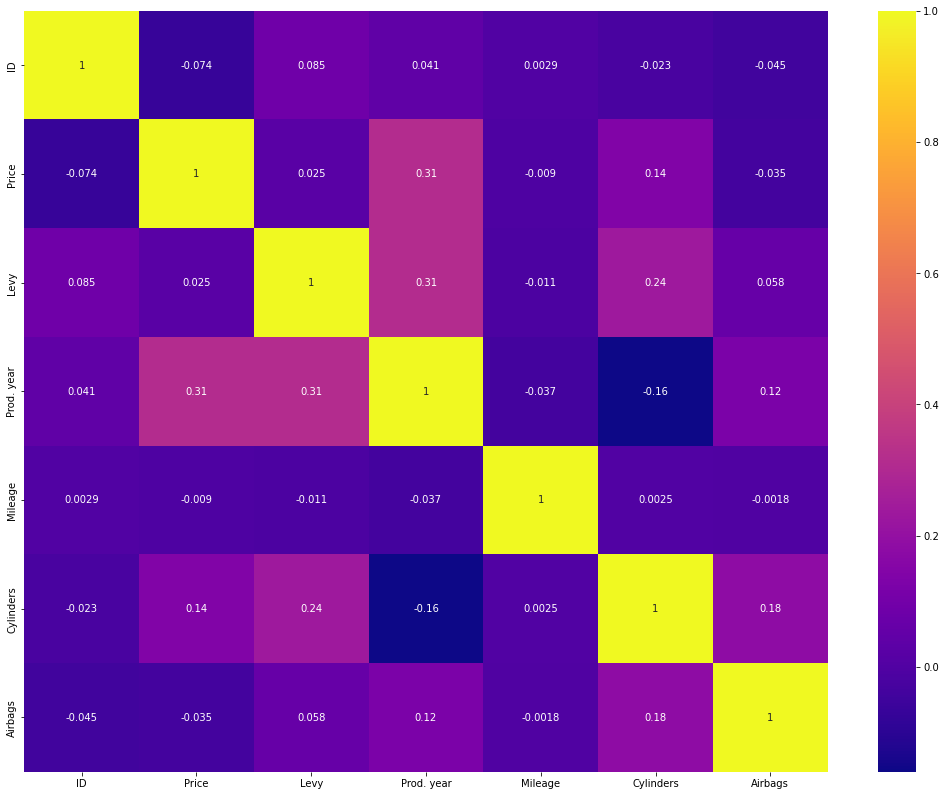

In [5]:
plt.figure()
sns.heatmap(df.corr(), annot=True, cmap = 'plasma')
plt.show()

Como observamos, tenemos la información duplicada por encima y por debajo de nuestra diagonal, por lo que vamos a eliminar uno de los lados.

In [6]:
# Creamos un dataframe todo de unos de la misma forma que nuestra matriz de correlación
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True]])

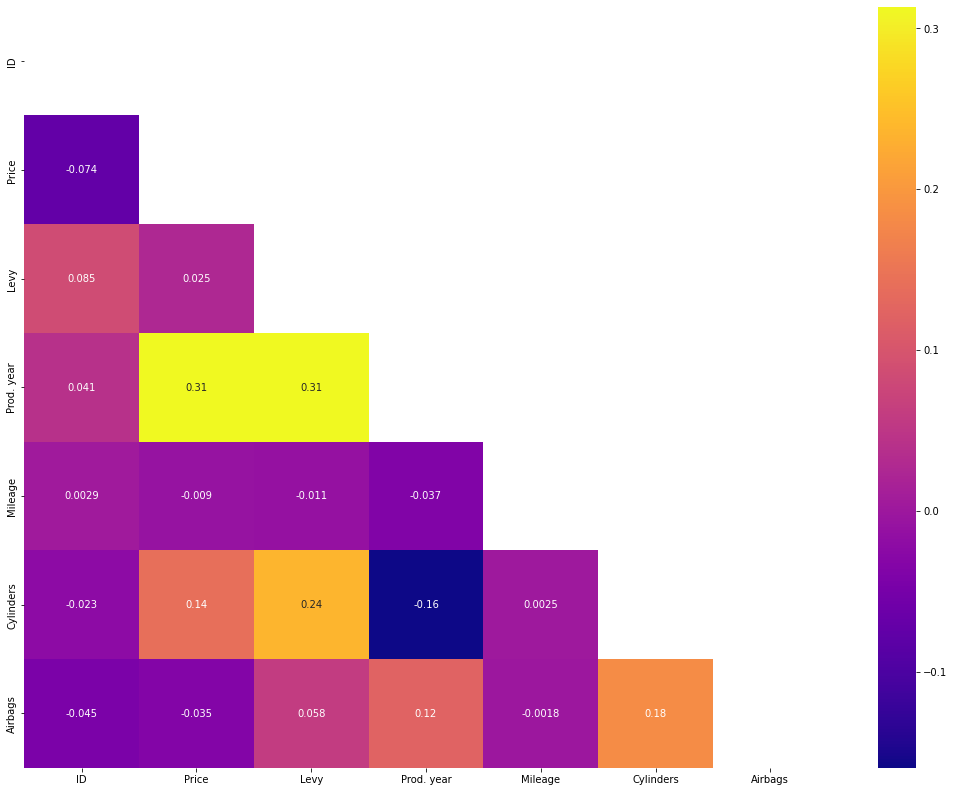

In [7]:
sns.heatmap(df.corr(),
            cmap = "plasma", 
            mask = mask, # incorporamos la máscara en nuestro plot
           annot = True); 

Podemos observar que todas nuestras variables están correlacionadas, sin embargo vemos que tienen una intensidad o fuerza de correlación muy baja. Ninguna se correlaciona en más de 0.50 o -0.50. Por lo tanto, no vamos a descartar ninguna y las utilizaremos todas para nuestro modelo de predicción.

- <font color=violet> Guardad la gráfica del heatmap.